In [377]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [313]:
dataset=pd.read_csv("flight_detail.csv")
dataset.head()

,Airlines,Source,Destination,Total Stops,Duration,Departure Time,Arrival Time,Price,Date of Journey
0,Air Asia,New Delhi,Mumbai,1 Stop,6h 00m,05:20,11:20,"5,953",17/10/2021
1,Go First,New Delhi,Mumbai,Non Stop,2h 00m,09:05,11:05,"5,954",17/10/2021
2,Go First,New Delhi,Mumbai,Non Stop,2h 05m,06:15,08:20,"5,954",17/10/2021
3,Go First,New Delhi,Mumbai,1 Stop,4h 40m,17:45,22:25,"5,954",17/10/2021
4,Go First,New Delhi,Mumbai,1 Stop,4h 55m,16:10,21:05,"5,954",17/10/2021


In [314]:
df=dataset.copy()

### Exploratory Data Analysis

In [315]:
df.shape

(1710, 9)

1. Dataset has 1710 rows and 9 columns.

In [316]:
df.columns

Index(['Airlines', 'Source', 'Destination', 'Total Stops', 'Duration',
       'Departure Time', 'Arrival Time', 'Price', 'Date of Journey'],
      dtype='object')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airlines         1710 non-null   object
 1   Source           1710 non-null   object
 2   Destination      1710 non-null   object
 3   Total Stops      1710 non-null   object
 4   Duration         1710 non-null   object
 5   Departure Time   1710 non-null   object
 6   Arrival Time     1710 non-null   object
 7   Price            1710 non-null   object
 8   Date of Journey  1710 non-null   object
dtypes: object(9)
memory usage: 120.4+ KB


In [318]:
df.dtypes

Airlines           object
Source             object
Destination        object
Total Stops        object
Duration           object
Departure Time     object
Arrival Time       object
Price              object
Date of Journey    object
dtype: object

1. All the columns are object type, we need to change their type according to the data in the columns.

In [319]:
df.isnull().sum()

Airlines           0
Source             0
Destination        0
Total Stops        0
Duration           0
Departure Time     0
Arrival Time       0
Price              0
Date of Journey    0
dtype: int64

1. There are no null value present in the dataset.

In [320]:
df['Airlines'].unique()

array(['Air Asia', 'Go First', 'Vistara', 'Air India', 'IndiGo',
       'SpiceJet'], dtype=object)

In [321]:
df['Source'].unique()

array(['New Delhi', 'Bangalore', 'Goa', 'Chennai', 'Kolkata', 'Kochi',
       'Nasik', 'Mumbai', 'Lucknow', 'Pune', 'Varanasi', 'Hyderabad',
       'Ahmedabad', 'Jammu', 'Jaipur', 'Indore', 'Trivandrum'],
      dtype=object)

In [322]:
df['Source'].nunique()

17

In [323]:
df['Destination'].unique()

array(['Mumbai', 'Goa', 'Bangalore', 'Kolkata', 'Chennai', 'Ahmedabad',
       'Jaipur', 'Hyderabad', 'New Delhi', 'Kochi', 'Udaipur', 'Varanasi',
       'Jammu', 'Trivandrum', 'Indore'], dtype=object)

In [324]:
df['Destination'].nunique()

15

In [325]:
df['Total Stops'].unique()

array(['1 Stop', 'Non Stop', '2 Stop(s)', '3 Stop(s)', '4 Stop(s)'],
      dtype=object)

In [326]:
# converting date of journey column into datetime type from object type.

df['Date of Journey']=pd.to_datetime(df['Date of Journey'])

In [327]:
df.head()

,Airlines,Source,Destination,Total Stops,Duration,Departure Time,Arrival Time,Price,Date of Journey
0,Air Asia,New Delhi,Mumbai,1 Stop,6h 00m,05:20,11:20,"5,953",2021-10-17
1,Go First,New Delhi,Mumbai,Non Stop,2h 00m,09:05,11:05,"5,954",2021-10-17
2,Go First,New Delhi,Mumbai,Non Stop,2h 05m,06:15,08:20,"5,954",2021-10-17
3,Go First,New Delhi,Mumbai,1 Stop,4h 40m,17:45,22:25,"5,954",2021-10-17
4,Go First,New Delhi,Mumbai,1 Stop,4h 55m,16:10,21:05,"5,954",2021-10-17


In [328]:
# extracting date and monthh from this column.

df['Month']=df['Date of Journey'].apply(lambda x:x.month)
df['Day']=df['Date of Journey'].apply(lambda x:x.day)

In [329]:
df.head()

,Airlines,Source,Destination,Total Stops,Duration,Departure Time,Arrival Time,Price,Date of Journey,Month,Day
0,Air Asia,New Delhi,Mumbai,1 Stop,6h 00m,05:20,11:20,"5,953",2021-10-17,10,17
1,Go First,New Delhi,Mumbai,Non Stop,2h 00m,09:05,11:05,"5,954",2021-10-17,10,17
2,Go First,New Delhi,Mumbai,Non Stop,2h 05m,06:15,08:20,"5,954",2021-10-17,10,17
3,Go First,New Delhi,Mumbai,1 Stop,4h 40m,17:45,22:25,"5,954",2021-10-17,10,17
4,Go First,New Delhi,Mumbai,1 Stop,4h 55m,16:10,21:05,"5,954",2021-10-17,10,17


1. Now we can drop Date of Journey column as we extracted the required data.

In [330]:
df.drop('Date of Journey',axis=1,inplace=True)

In [331]:
# coverting price column from object to float.

df['Price']=df['Price'].str.replace("," , '').astype(float)

In [332]:
df['Arrival Time']=df['Arrival Time'].str.split("\n").str[0]

In [333]:
df

,Airlines,Source,Destination,Total Stops,Duration,Departure Time,Arrival Time,Price,Month,Day
0,Air Asia,New Delhi,Mumbai,1 Stop,6h 00m,05:20,11:20,5953.0,10,17
1,Go First,New Delhi,Mumbai,Non Stop,2h 00m,09:05,11:05,5954.0,10,17
2,Go First,New Delhi,Mumbai,Non Stop,2h 05m,06:15,08:20,5954.0,10,17
3,Go First,New Delhi,Mumbai,1 Stop,4h 40m,17:45,22:25,5954.0,10,17
4,Go First,New Delhi,Mumbai,1 Stop,4h 55m,16:10,21:05,5954.0,10,17
...,...,...,...,...,...,...,...,...,...,...
1705,IndiGo,Lucknow,Indore,1 Stop,5h 40m,06:05,11:45,8303.0,10,28
1706,Vistara,Lucknow,Indore,1 Stop,16h 30m,15:25,07:55,8502.0,10,28
1707,IndiGo,Lucknow,Indore,1 Stop,7h 25m,14:10,21:35,11191.0,10,28
1708,Air India,Lucknow,Indore,2 Stop(s),25h 00m,15:30,16:30,12872.0,10,28


In [334]:
# coverting departure and arrival column from object to integer.

df['Departure Time Hr']=df['Departure Time'].str.split(':').str[0].astype(int)
df['Departure Time Min']=df['Departure Time'].str.split(':').str[1].astype(int)

df['Arrival Time Hr']=df['Arrival Time'].str.split(':').str[0].astype(int)
df['Arrival Time Min']=df['Arrival Time'].str.split(':').str[1].astype(int)

In [335]:
df

,Airlines,Source,Destination,Total Stops,Duration,Departure Time,Arrival Time,Price,Month,Day,Departure Time Hr,Departure Time Min,Arrival Time Hr,Arrival Time Min
0,Air Asia,New Delhi,Mumbai,1 Stop,6h 00m,05:20,11:20,5953.0,10,17,5,20,11,20
1,Go First,New Delhi,Mumbai,Non Stop,2h 00m,09:05,11:05,5954.0,10,17,9,5,11,5
2,Go First,New Delhi,Mumbai,Non Stop,2h 05m,06:15,08:20,5954.0,10,17,6,15,8,20
3,Go First,New Delhi,Mumbai,1 Stop,4h 40m,17:45,22:25,5954.0,10,17,17,45,22,25
4,Go First,New Delhi,Mumbai,1 Stop,4h 55m,16:10,21:05,5954.0,10,17,16,10,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,IndiGo,Lucknow,Indore,1 Stop,5h 40m,06:05,11:45,8303.0,10,28,6,5,11,45
1706,Vistara,Lucknow,Indore,1 Stop,16h 30m,15:25,07:55,8502.0,10,28,15,25,7,55
1707,IndiGo,Lucknow,Indore,1 Stop,7h 25m,14:10,21:35,11191.0,10,28,14,10,21,35
1708,Air India,Lucknow,Indore,2 Stop(s),25h 00m,15:30,16:30,12872.0,10,28,15,30,16,30


In [336]:
# extracting time hour and min from duration columns.

df['Duration Hr']=(df['Duration'].str.split(' ').str[0])
df['Duration Min']=(df['Duration'].str.split(' ').str[1])

# removing the 'h' and 'm' word from the columns and convert it into integer type.

df['Duration Hr']=df['Duration Hr'].str.slice(stop=-1).astype(int)
df['Duration Min']=df['Duration Min'].str.slice(stop=-1).astype(int)

In [337]:
df.head()

,Airlines,Source,Destination,Total Stops,Duration,Departure Time,Arrival Time,Price,Month,Day,Departure Time Hr,Departure Time Min,Arrival Time Hr,Arrival Time Min,Duration Hr,Duration Min
0,Air Asia,New Delhi,Mumbai,1 Stop,6h 00m,05:20,11:20,5953.0,10,17,5,20,11,20,6,0
1,Go First,New Delhi,Mumbai,Non Stop,2h 00m,09:05,11:05,5954.0,10,17,9,5,11,5,2,0
2,Go First,New Delhi,Mumbai,Non Stop,2h 05m,06:15,08:20,5954.0,10,17,6,15,8,20,2,5
3,Go First,New Delhi,Mumbai,1 Stop,4h 40m,17:45,22:25,5954.0,10,17,17,45,22,25,4,40
4,Go First,New Delhi,Mumbai,1 Stop,4h 55m,16:10,21:05,5954.0,10,17,16,10,21,5,4,55


In [338]:
# Now we can drop original columns after extracting the required data.

df.drop(columns=['Duration','Departure Time','Arrival Time'],axis=1,inplace=True)

In [339]:
df.head()

,Airlines,Source,Destination,Total Stops,Price,Month,Day,Departure Time Hr,Departure Time Min,Arrival Time Hr,Arrival Time Min,Duration Hr,Duration Min
0,Air Asia,New Delhi,Mumbai,1 Stop,5953.0,10,17,5,20,11,20,6,0
1,Go First,New Delhi,Mumbai,Non Stop,5954.0,10,17,9,5,11,5,2,0
2,Go First,New Delhi,Mumbai,Non Stop,5954.0,10,17,6,15,8,20,2,5
3,Go First,New Delhi,Mumbai,1 Stop,5954.0,10,17,17,45,22,25,4,40
4,Go First,New Delhi,Mumbai,1 Stop,5954.0,10,17,16,10,21,5,4,55


### Univariate Analysis

IndiGo       550
Air India    377
Vistara      321
Go First     233
Air Asia     146
SpiceJet      83
Name: Airlines, dtype: int64


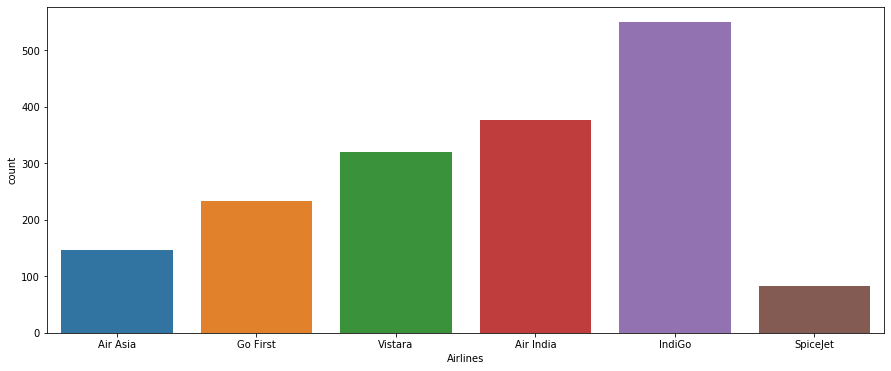

In [340]:
print(df.Airlines.value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['Airlines'])

1. IndiGo has the highest count in the dataset followed by Air India and Vistara respectively.

New Delhi     894
Kolkata       130
Bangalore     120
Mumbai         90
Lucknow        70
Chennai        60
Kochi          50
Pune           47
Ahmedabad      45
Jammu          45
Varanasi       45
Goa            25
Trivandrum     25
Hyderabad      25
Indore         24
Jaipur         11
Nasik           4
Name: Source, dtype: int64


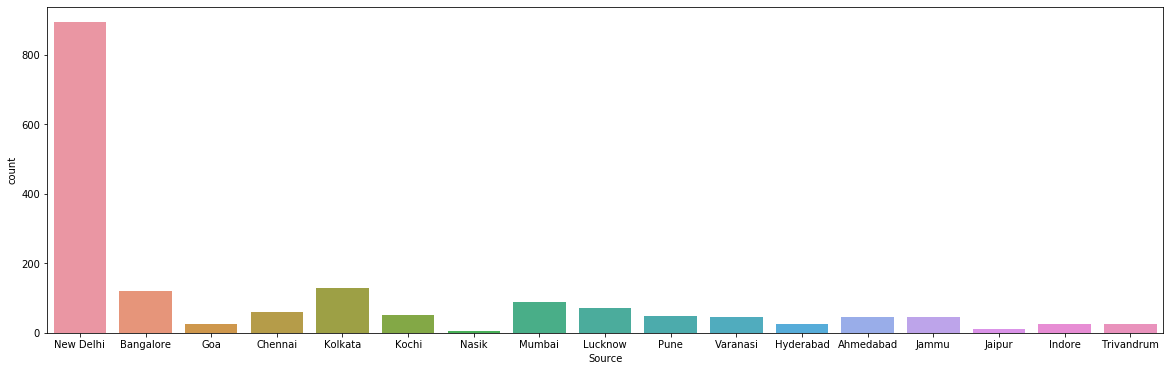

In [341]:
print(df.Source.value_counts())
plt.figure(figsize=(20,6))
sns.countplot(df['Source'])

1. New Delhi is highest in count whereas Nasik and Jaipur are lowest in count respectively.

Mumbai        879
Hyderabad     175
Bangalore     140
Varanasi       95
Chennai        80
New Delhi      74
Kolkata        70
Udaipur        47
Kochi          35
Jammu          35
Ahmedabad      25
Goa            25
Indore         15
Trivandrum     11
Jaipur          4
Name: Destination, dtype: int64


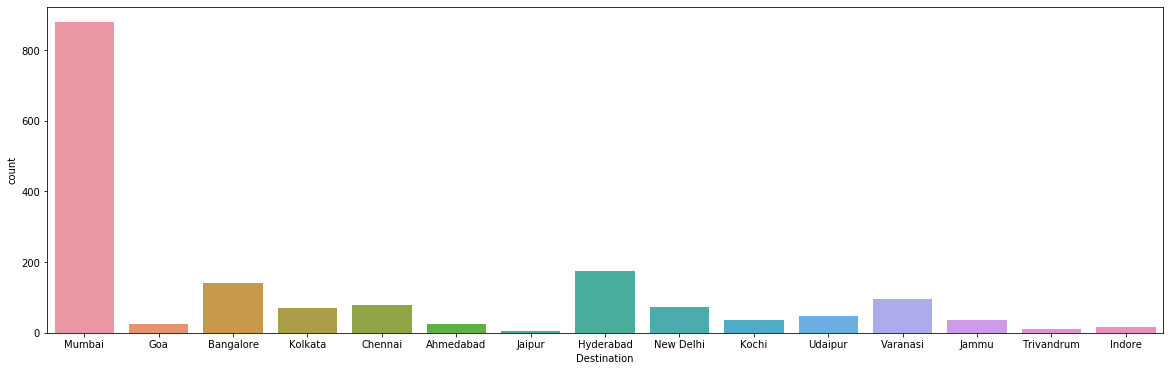

In [342]:
print(df.Destination.value_counts())
plt.figure(figsize=(20,6))
sns.countplot(df['Destination'])

1. Mumbai is highest in count whereas Jaipur and Trivandrum are lowest in count respectively.

1 Stop       1153
Non Stop      404
2 Stop(s)     122
3 Stop(s)      29
4 Stop(s)       2
Name: Total Stops, dtype: int64


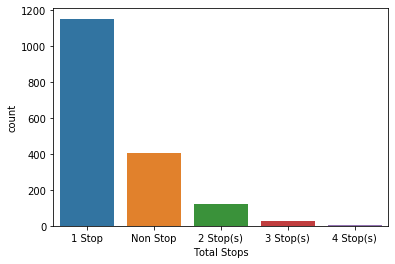

In [343]:
print(df['Total Stops'].value_counts())
sns.countplot(df['Total Stops'])

1. 1 stop is highest in number whereas 4 stop is lowest.
2. we can conclude that most of the flights are connect places with 1 stop only.

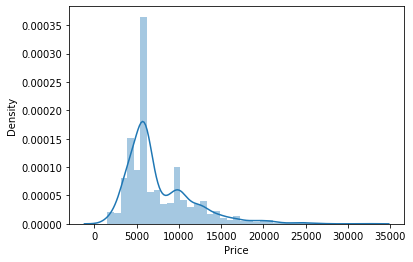

In [344]:
sns.distplot(df['Price'])

1. Most of the flights are having price between 3800 to 5500 and some have approx 10000 to 13000.

### Bivariate Analysis

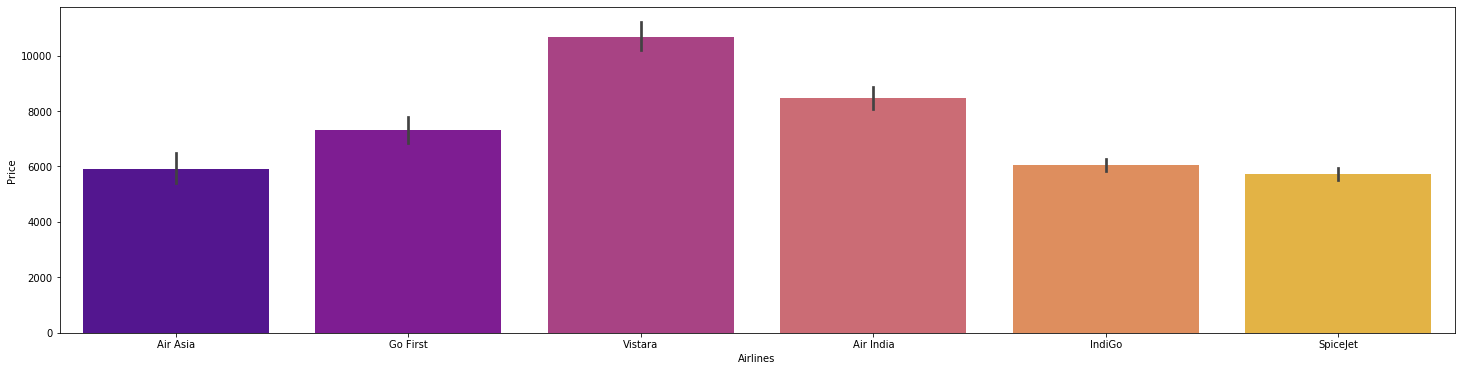

In [345]:
plt.figure(figsize=(25,6))
sns.barplot(x='Airlines',y='Price',data=df,palette='plasma')

1. Vistara and Air India has highest price among all respectively.

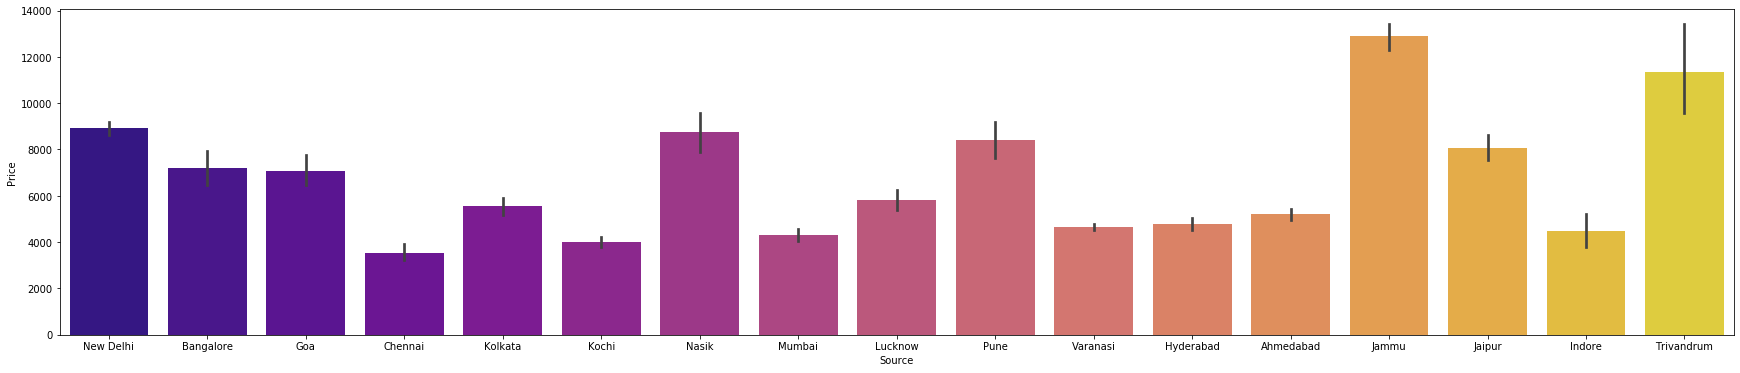

In [346]:
plt.figure(figsize=(30,6))
sns.barplot(x='Source',y='Price',data=df,palette='plasma')

1. Among all the sources Jammu and Trivandrum has highest price for the flight.

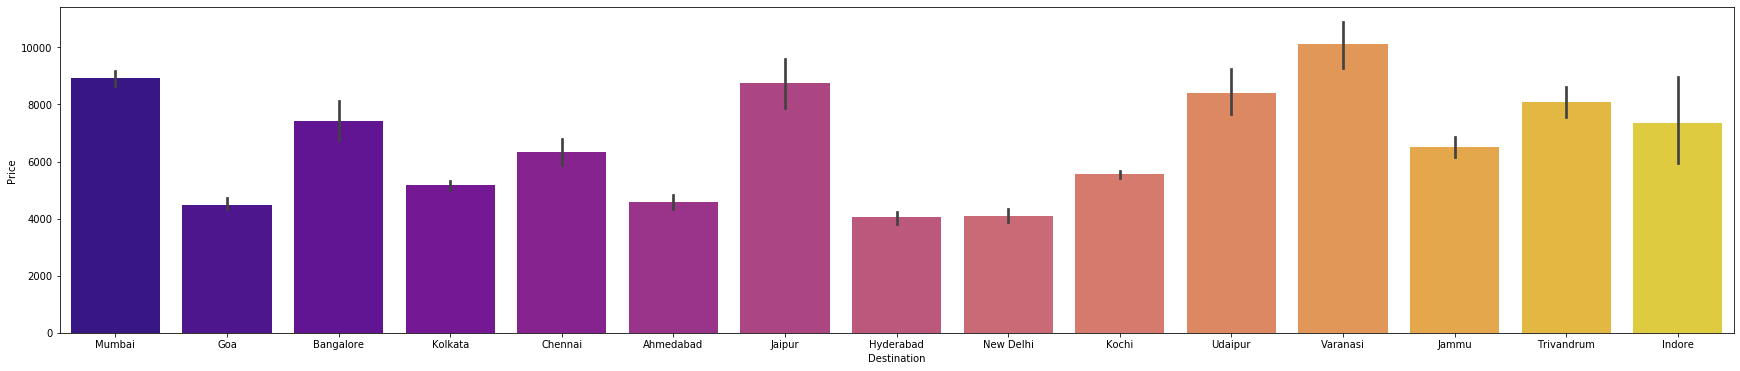

In [347]:
plt.figure(figsize=(30,6))
sns.barplot(x='Destination',y='Price',data=df,palette='plasma')

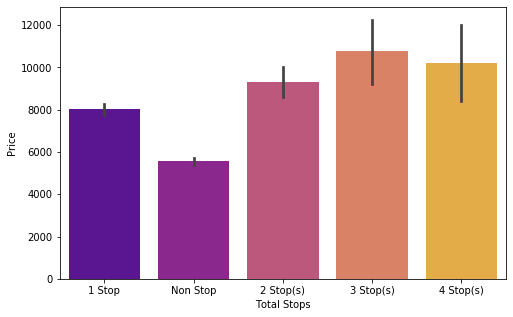

In [348]:
plt.figure(figsize=(8,5))
sns.barplot(x='Total Stops',y='Price',data=df,palette='plasma')

More no. of stops between source and destination leads to high price.

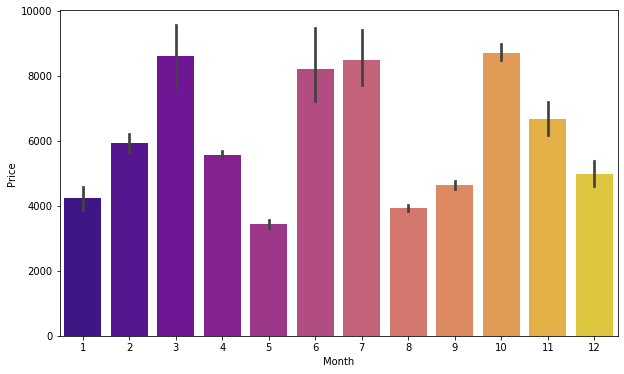

In [349]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month',y='Price',data=df,palette='plasma')

Mostly Flight prices are highest in the month of March, June, July and October.

In [350]:
df.describe()

,Price,Month,Day,Departure Time Hr,Departure Time Min,Arrival Time Hr,Arrival Time Min,Duration Hr,Duration Min
count,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,7596.524561,9.038012,18.323977,12.823977,26.590643,15.046784,26.809357,9.228655,26.183626
std,3998.835514,2.799997,6.173260,5.121463,17.745576,5.648172,16.938049,7.284473,17.113539
min,1552.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5066.250000,10.000000,15.000000,8.000000,10.000000,11.000000,10.000000,3.000000,10.000000
50%,5955.000000,10.000000,19.000000,13.000000,25.000000,15.000000,30.000000,7.000000,25.000000
75%,9840.000000,10.000000,22.000000,17.000000,45.000000,20.000000,40.000000,13.000000,40.000000
max,32100.000000,12.000000,31.000000,23.000000,55.000000,23.000000,59.000000,32.000000,55.000000


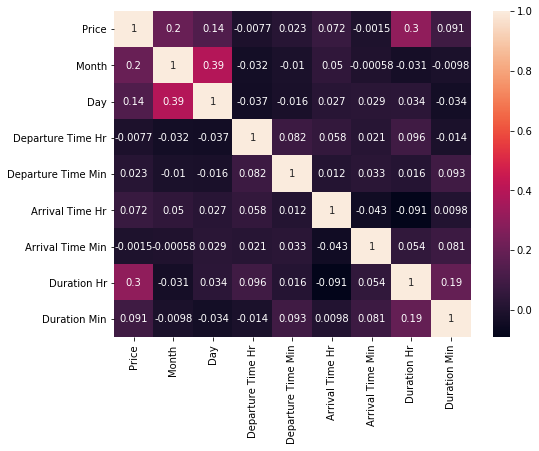

In [351]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [352]:
df.shape

(1710, 13)

### Checking for outliers

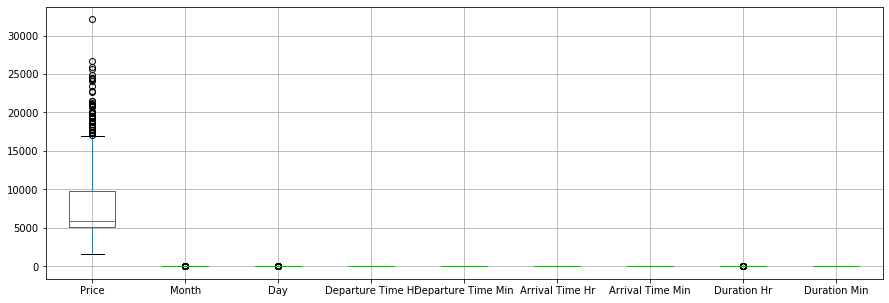

In [353]:
df.boxplot(figsize=[15,5])

No outliers are present in the columns except the target column but we should not remove it from target column.

### Encoding of Categorical Columns

In [354]:
df.dtypes

Airlines               object
Source                 object
Destination            object
Total Stops            object
Price                 float64
Month                   int64
Day                     int64
Departure Time Hr       int32
Departure Time Min      int32
Arrival Time Hr         int32
Arrival Time Min        int32
Duration Hr             int32
Duration Min            int32
dtype: object

In [355]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [356]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1)) 

In [357]:
df.head()

,Airlines,Source,Destination,Total Stops,Price,Month,Day,Departure Time Hr,Departure Time Min,Arrival Time Hr,Arrival Time Min,Duration Hr,Duration Min
0,0.0,13.0,10.0,0.0,5953.0,10,17,5,20,11,20,6,0
1,2.0,13.0,10.0,4.0,5954.0,10,17,9,5,11,5,2,0
2,2.0,13.0,10.0,4.0,5954.0,10,17,6,15,8,20,2,5
3,2.0,13.0,10.0,0.0,5954.0,10,17,17,45,22,25,4,40
4,2.0,13.0,10.0,0.0,5954.0,10,17,16,10,21,5,4,55


In [358]:
df.duplicated().value_counts()

False    1686
True       24
dtype: int64

There are 24 rows are duplicate. so, we can remove those duplicated rows.

In [359]:
df.drop_duplicates(inplace=True)
df.shape

(1686, 13)

### Spliting of the data

In [360]:
x=df.drop('Price',axis=1)
y=df['Price']

In [361]:
x.shape

(1686, 12)

### Scaling of the data

In [362]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [363]:
sc_x=sc.fit_transform(x)

### Finding the best random state

In [380]:
maxacc=0
maxrs=0

for i in range(0,250):
    x_train,x_test,y_train,y_test=train_test_split(sc_x,y,test_size=.20,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    r2_sc=r2_score(y_test,pred)
    if r2_sc>maxacc:
        maxacc=r2_sc
        maxrs=i
print('best r2_sc is:',maxacc,' at random state', maxrs)

best r2_sc is: 0.7575548015642087  at random state 14


In [407]:
x_train,x_test,y_train,y_test=train_test_split(sc_x,y,test_size=.20,random_state=0)

In [382]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1348, 12) (338, 12) (1348,) (338,)


### Model Training

In [390]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
adr=AdaBoostRegressor()
xgr=XGBRegressor()

In [409]:
cv1 = KFold(n_splits=10, shuffle=True)

In [410]:
model=[lr,rfr,dtr,knr,adr,xgr]

for i in model:
    print('model:',i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(r2_score(y_test,pred))
    print(np.sqrt(mean_squared_error(y_test,pred)))
    crs=cross_val_score(i,sc_x,y,cv=cv1)
    print(crs.mean())
    print('\n')

model: LinearRegression()
0.23599964607488788
3249.65938087709
0.23950102042537041


model: RandomForestRegressor()
0.7787346042353743
1748.8308731284624
0.7485109484055417


model: DecisionTreeRegressor()
0.7462879230169588
1872.6716351924697
0.5676708296492554


model: KNeighborsRegressor()
0.36046788403694685
2973.1871111434984
0.4857554047329205


model: AdaBoostRegressor()
0.18753429692482426
3351.147785230438
0.2760538093214101


model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameter

On the basis of r2_score and cv_score we select only two model for hyperparameter RandomForestRegressor and XBGRegressor.

### Hyperparameter Tuning using GridSearchCV

In [438]:
# random forest regressor

par={'n_estimators':(30,50,100,120,150),'max_depth':np.arange(5,16),'max_features':['auto','sqrt','log2']}

gcv=GridSearchCV(rfr,par,cv=cv1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (30, 50, 100, 120, 150)})

In [439]:
gcv.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150}

In [482]:
rf=RandomForestRegressor(n_estimators=200,max_depth=19,max_features='auto')
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))
crs=cross_val_score(rfr,sc_x,y,cv=cv1)
print(crs.mean())

0.7681709283346609
1790.0905922840877
0.750399903014638


In [420]:
# xgb regressor

par={'n_estimators':[30,50,100,120,150,180],'max_depth':range(1,10),'eta':[0.001,0.01,0.1,0.2]}
gcv=GridSearchCV(xgr,par,cv=cv1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
         

In [421]:
gcv.best_params_

{'eta': 0.001, 'max_depth': 6, 'n_estimators': 30}

In [476]:
xg=XGBRegressor(n_estimators=150,max_depth=6,eta=0.14)
xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print(r2_score(y_test,predxg))
print(np.sqrt(mean_squared_error(y_test,predxg)))
crs=cross_val_score(xgr,sc_x,y,cv=cv1)
print(crs.mean())

0.7707377614115021
1780.1529832907875
0.7553782754807875


After hyperparameter tuning we can see that xgbregressor have highest r2_score and least RMSE value.So, it will be our final model.

### Saving our Final Model

In [483]:
import joblib

In [484]:
joblib.dump(xg,'flight_price_xgbr.obj')

['flight_price_xgbr.obj']